2025-03-13 16:24:47.846831: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741897487.859167 1289659 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741897487.862693 1289659 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-13 16:24:47.876968: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 6862 files belonging to 11 classes.
Using 5490 files for training.
Using 1372 files for validation.


I0000 00:00:1741897491.253255 1289659 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2157 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


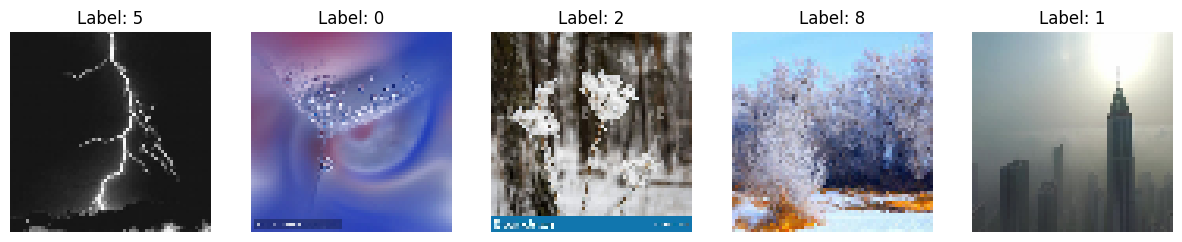

In [2]:
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt

# Dataset/hyperparams
sandbox_dir = pathlib.Path("../Data/Weather_Dataset")
batch_size = 8
image_size = (64, 64) #do not change for resnet50

# Load dataset
dataset = tf.keras.utils.image_dataset_from_directory(
    sandbox_dir,
    labels='inferred',
    label_mode='int',
    validation_split=0.2,
    subset="both",
    seed=1234,
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True
)

### USE THESE 
train_dataset, val_dataset = dataset  

# print first 5 of training set
for images, labels in train_dataset.take(1):
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for i in range(5):
        axes[i].imshow(images[i].numpy().astype("uint8"))
        axes[i].axis("off")
        axes[i].set_title(f"Label: {labels[i].numpy()}")
    plt.show()
    break

2025-03-13 17:14:35.576372: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741900475.621910 1346498 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741900475.635434 1346498 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-13 17:14:35.737476: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 6862 files belonging to 11 classes.
Using 5490 files for training.
Using 1372 files for validation.


I0000 00:00:1741900479.972829 1346498 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2157 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
2025-03-13 17:14:41.070880: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-03-13 17:14:41.387126: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-03-13 17:14:41.626604: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-03-13 17:14:42.191857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-03-13 17:14:42.432177: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-03-13 17:14:42.724731: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-03-13 17:14:43.308469: W tensorflow/core/lib/png/p

Original class counts: {0: np.int32(559), 1: np.int32(678), 2: np.int32(379), 3: np.int32(514), 4: np.int32(485), 5: np.int32(296), 6: np.int32(397), 7: np.int32(189), 8: np.int32(932), 9: np.int32(549), 10: np.int32(512)}


2025-03-13 17:14:53.022950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-03-13 17:14:53.270117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-03-13 17:14:53.547097: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-03-13 17:14:54.065246: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-03-13 17:14:54.316626: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


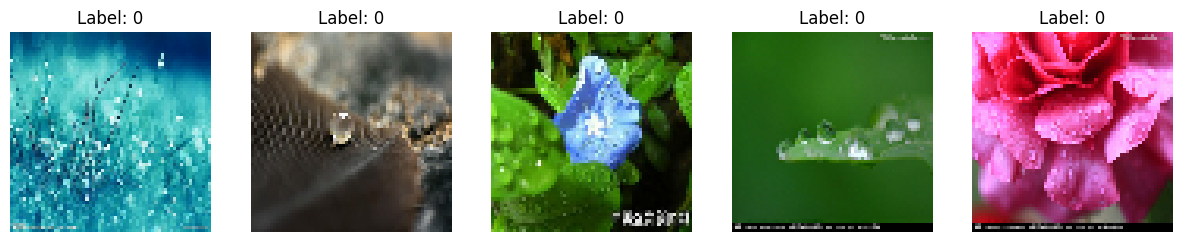

In [1]:
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt

# Dataset/hyperparams
sandbox_dir = pathlib.Path("../Data/Weather_Dataset")
batch_size = 8
image_size = (64, 64)  # do not change for resnet50

# Load dataset
dataset = tf.keras.utils.image_dataset_from_directory(
    sandbox_dir,
    labels='inferred',
    label_mode='int',
    validation_split=0.2,
    subset="both",
    seed=1234,
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True
)

### USE THESE 
train_dataset, val_dataset = dataset  

# === Oversampling Preprocessing for the Training Dataset ===
# Unbatch the training dataset to work with individual samples
train_ds_unbatched = train_dataset.unbatch()

# Retrieve class names and determine number of classes
class_names = train_dataset.class_names
num_classes = len(class_names)

# Create a separate dataset for each class using filtering
class_datasets = {}
for i in range(num_classes):
    # Filter out samples that belong to class i
    class_datasets[i] = train_ds_unbatched.filter(lambda image, label: label == i)

# Count samples per class
counts = {}
for i in range(num_classes):
    counts[i] = class_datasets[i].reduce(0, lambda x, _: x + 1).numpy()
print("Original class counts:", counts)

# Determine the maximum count among all classes
max_count = max(counts.values())

# Oversample each class: repeat and take exactly max_count samples for each
oversampled_datasets = []
for i in range(num_classes):
    ds = class_datasets[i].repeat().take(max_count)
    oversampled_datasets.append(ds)

# Combine the oversampled datasets into one balanced dataset
balanced_train_ds = oversampled_datasets[0]
for ds in oversampled_datasets[1:]:
    balanced_train_ds = balanced_train_ds.concatenate(ds)

# Shuffle and batch the balanced training dataset
balanced_train_ds = balanced_train_ds.shuffle(buffer_size=1000).batch(batch_size)

# Optionally, replace train_dataset with the balanced version
train_dataset = balanced_train_ds

# === Display a few samples from the balanced training dataset ===
for images, labels in train_dataset.take(1):
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for i in range(5):
        axes[i].imshow(images[i].numpy().astype("uint8"))
        axes[i].axis("off")
        axes[i].set_title(f"Label: {labels[i].numpy()}")
    plt.show()
    break

In [2]:
import tensorflow as tf
import keras_tuner as kt
import pathlib
import matplotlib.pyplot as plt

num_classes = len(class_names)

# Define the model-building function for Keras Tuner
def build_model(hp):
    model = tf.keras.Sequential([
        # Input layer
        tf.keras.layers.InputLayer(input_shape=image_size + (3,)),
        
        # First convolutional block
        tf.keras.layers.Conv2D(
            filters=hp.Int("conv_1_filters", min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice("conv_1_kernel", values=[3, 5]),
            activation="relu",
            padding="same"
        ),
        tf.keras.layers.MaxPooling2D(),
        
        # Second convolutional block
        tf.keras.layers.Conv2D(
            filters=hp.Int("conv_2_filters", min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice("conv_2_kernel", values=[3, 5]),
            activation="relu",
            padding="same"
        ),
        tf.keras.layers.MaxPooling2D(),
        
        # Flatten and Dense layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(
            units=hp.Int("dense_units", min_value=64, max_value=512, step=64),
            activation="relu"
        ),
        tf.keras.layers.Dense(num_classes, activation="softmax")
    ])

    # Compile the model using a tunable learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
        ),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Set up the Keras Tuner with Hyperband search
tuner = kt.Hyperband(
    build_model,
    objective="val_accuracy",
    max_epochs=10,
    factor=3,
    directory="keras_tuner_dir",
    project_name="weather_cnn"
)

# Optional: early stopping callback to prevent overfitting
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

# Run the hyperparameter search
tuner.search(train_dataset, validation_data=val_dataset, epochs=10, callbacks=[stop_early])

# Retrieve the best hyperparameters found
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("The best hyperparameters are:")
print(f"conv_1_filters: {best_hps.get('conv_1_filters')}")
print(f"conv_1_kernel: {best_hps.get('conv_1_kernel')}")
print(f"conv_2_filters: {best_hps.get('conv_2_filters')}")
print(f"conv_2_kernel: {best_hps.get('conv_2_kernel')}")
print(f"dense_units: {best_hps.get('dense_units')}")
print(f"learning_rate: {best_hps.get('learning_rate')}")


Trial 28 Complete [00h 02m 24s]
val_accuracy: 0.0903790071606636

Best val_accuracy So Far: 0.544460654258728
Total elapsed time: 00h 51m 07s
The best hyperparameters are:
conv_1_filters: 96
conv_1_kernel: 3
conv_2_filters: 96
conv_2_kernel: 3
dense_units: 256
learning_rate: 0.0001


In [ ]:
# Rebuild the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_dataset, validation_data=val_dataset, epochs=10)

# Visualize the training and validation accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy vs. epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"], loc="upper left")
plt.show()

Epoch 1/10


2025-03-13 17:33:26.442126: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-03-13 17:33:26.677762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-03-13 17:33:26.942630: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-03-13 17:33:27.471984: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-03-13 17:33:27.700097: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  20/1282 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.7028 - loss: 15.7633   

2025-03-13 17:33:30.244494: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  38/1282 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.7671 - loss: 11.9351

2025-03-13 17:33:30.488916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  66/1282 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.8227 - loss: 8.8820

2025-03-13 17:33:30.799642: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 101/1282 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.8566 - loss: 6.9967

2025-03-13 17:33:31.341392: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 123/1282 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.8678 - loss: 6.4103

2025-03-13 17:33:31.751234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 135/1282 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.8710 - loss: 6.2897

2025-03-13 17:33:31.994480: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 147/1282 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.8729 - loss: 6.1691

2025-03-13 17:33:32.327669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 170/1282 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.8746 - loss: 5.9291

2025-03-13 17:33:32.931991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 182/1282 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.8752 - loss: 5.8039

2025-03-13 17:33:33.145460: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 193/1282 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.8756 - loss: 5.6915

2025-03-13 17:33:33.456069: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 217/1282 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.8768 - loss: 5.4525

2025-03-13 17:33:34.022565: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 228/1282 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.8774 - loss: 5.3481

2025-03-13 17:33:34.312695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 245/1282 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.8781 - loss: 5.1989

2025-03-13 17:33:34.577420: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 261/1282 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.8778 - loss: 5.0705

2025-03-13 17:33:34.828256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 279/1282 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.8765 - loss: 4.9369

2025-03-13 17:33:35.131246: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 311/1282 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8730 - loss: 4.7198

2025-03-13 17:33:35.668950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 324/1282 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8714 - loss: 4.6381

2025-03-13 17:33:35.904321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 343/1282 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.8689 - loss: 4.5247

2025-03-13 17:33:36.207748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 361/1282 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.8666 - loss: 4.4245

2025-03-13 17:33:36.519507: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 376/1282 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.8645 - loss: 4.3465

2025-03-13 17:33:36.778750: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 394/1282 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.8617 - loss: 4.2583

2025-03-13 17:33:37.106146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 420/1282 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.8577 - loss: 4.1394

2025-03-13 17:33:37.635668: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 435/1282 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.8553 - loss: 4.0750

2025-03-13 17:33:37.923846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 455/1282 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8523 - loss: 3.9931

2025-03-13 17:33:38.235852: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 467/1282 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8505 - loss: 3.9460

2025-03-13 17:33:38.711144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 476/1282 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8492 - loss: 3.9120

2025-03-13 17:33:38.956973: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 488/1282 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.8475 - loss: 3.8678

2025-03-13 17:33:39.267801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 505/1282 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.8452 - loss: 3.8076

2025-03-13 17:33:39.771371: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 514/1282 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.8440 - loss: 3.7768

2025-03-13 17:33:40.040702: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 526/1282 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.8424 - loss: 3.7367

2025-03-13 17:33:40.324780: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 542/1282 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.8404 - loss: 3.6849

2025-03-13 17:33:40.864631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 550/1282 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.8395 - loss: 3.6597

2025-03-13 17:33:41.105597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 560/1282 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.8385 - loss: 3.6286

2025-03-13 17:33:41.420939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 580/1282 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.8365 - loss: 3.5685

2025-03-13 17:33:42.020143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 586/1282 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.8360 - loss: 3.5509

2025-03-13 17:33:42.256768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 600/1282 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.8348 - loss: 3.5110

2025-03-13 17:33:42.533773: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 617/1282 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8334 - loss: 3.4642

2025-03-13 17:33:42.824362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 636/1282 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8319 - loss: 3.4138

2025-03-13 17:33:43.375851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 650/1282 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8308 - loss: 3.3780

2025-03-13 17:33:43.637273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 664/1282 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.8298 - loss: 3.3432

2025-03-13 17:33:43.947862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 684/1282 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.8285 - loss: 3.2950

2025-03-13 17:33:44.507285: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 699/1282 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.8276 - loss: 3.2600

2025-03-13 17:33:45.004151: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 703/1282 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8273 - loss: 3.2509

2025-03-13 17:33:45.256826: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 711/1282 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8269 - loss: 3.2329

2025-03-13 17:33:45.552853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 721/1282 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8263 - loss: 3.2108

2025-03-13 17:33:46.078648: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 728/1282 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8259 - loss: 3.1956

2025-03-13 17:33:46.330097: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 735/1282 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.8256 - loss: 3.1806

2025-03-13 17:33:46.673011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 746/1282 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.8250 - loss: 3.1573

2025-03-13 17:33:47.248269: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 751/1282 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.8248 - loss: 3.1469

2025-03-13 17:33:47.451146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 757/1282 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.8245 - loss: 3.1346

2025-03-13 17:33:47.749273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 770/1282 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.8239 - loss: 3.1082

2025-03-13 17:33:48.350295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 776/1282 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.8236 - loss: 3.0963

2025-03-13 17:33:48.584192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 781/1282 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.8234 - loss: 3.0864

2025-03-13 17:33:48.851479: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 793/1282 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.8229 - loss: 3.0631

2025-03-13 17:33:49.396737: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 799/1282 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.8227 - loss: 3.0516

2025-03-13 17:33:49.661658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 806/1282 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.8224 - loss: 3.0383

2025-03-13 17:33:49.971057: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 835/1282 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.8214 - loss: 2.9851

2025-03-13 17:33:50.457892: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 855/1282 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.8207 - loss: 2.9500

2025-03-13 17:33:50.704255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 895/1282 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8194 - loss: 2.8832

2025-03-13 17:33:51.085712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 945/1282 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8180 - loss: 2.8052

2025-03-13 17:33:51.672783: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 964/1282 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8175 - loss: 2.7772

2025-03-13 17:33:51.956402: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 981/1282 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8171 - loss: 2.7527

2025-03-13 17:33:52.251229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1014/1282 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.8164 - loss: 2.7069

2025-03-13 17:33:52.786075: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1029/1282 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8162 - loss: 2.6868

2025-03-13 17:33:53.052645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1063/1282 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8156 - loss: 2.6425

2025-03-13 17:33:53.569671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1077/1282 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8154 - loss: 2.6250

2025-03-13 17:33:53.819265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1095/1282 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8151 - loss: 2.6030

2025-03-13 17:33:54.130544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1124/1282 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8146 - loss: 2.5686

2025-03-13 17:33:54.703092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1140/1282 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8144 - loss: 2.5503

2025-03-13 17:33:54.960107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1159/1282 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8141 - loss: 2.5289

2025-03-13 17:33:55.315483: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1282/1282 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8129 - loss: 2.4013